In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig_banded
from numba import njit

In [383]:
size = 5
W = 2
disorder = np.random.random(size**3)*W - W/2

#@njit
def H(size):
    
    H_banded = np.zeros((7, size**3))
    H = np.zeros((size**3, size**3))
    
    for x in range(size):
        for y in range(size):
            for z in range(size):
                
                pos = x + size*y + size*size*z
                
                H[pos, (x + 1)%size + size*y + size*size*z]   = -1
                H[pos, (x - 1)%size + size*y + size*size*z]   = -1
                H[pos, x + size*((y + 1)%size) + size*size*z] = -1
                H[pos, x + size*((y - 1)%size) + size*size*z] = -1
                H[pos, x + size*y + size*size*((z + 1)%size)] = -1
                H[pos, x + size*y + size*size*((z - 1)%size)] = -1
                
                H[pos, pos] = disorder[pos]
    
    return H

Hamiltonian = H(size)

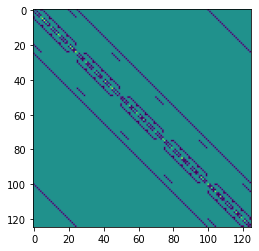

In [384]:
plt.imshow(Hamiltonian)

In [385]:
#@njit
def H_sparse(size):
    
    H_sparse = []
    
    for x in range(size):
        for y in range(size):
            for z in range(size):
                
                pos = x + size*y + size*size*z
                
                H_sparse.append([pos, (x + 1)%size + size*y + size*size*z, -1])
                H_sparse.append([pos, (x - 1)%size + size*y + size*size*z, -1])
                H_sparse.append([pos, x + size*((y + 1)%size) + size*size*z, -1])
                H_sparse.append([pos, x + size*((y - 1)%size) + size*size*z, -1])
                H_sparse.append([pos, x + size*y + size*size*((z + 1)%size), -1])
                H_sparse.append([pos, x + size*y + size*size*((z - 1)%size), -1])
                
                #d = disorder[pos]
                H_sparse.append([pos, pos, disorder[pos]])
    
    return H_sparse

In [386]:
H_sparse_saved = H_sparse(size)

In [410]:
#@njit
def H_build_diagonals(H_sparse_saved, size):
    
    diagonals        = (- np.array(H_sparse_saved)[:, 0] + np.array(H_sparse_saved)[:, 1])
    number_diagonals = len(np.unique(np.abs(diagonals)))
    H_diagonals = np.zeros((int(np.max(diagonals)) + 1, size**3), dtype=np.double)
    print((int(np.max(diagonals))))
    for i in range (len(np.array(H_sparse_saved)[:, 0])):
        
        if int(np.array(H_sparse_saved)[:, 0][i]) >= int(np.array(H_sparse_saved)[:, 1][i]):
            diag_n = int(np.array(H_sparse_saved)[:, 0][i] - np.array(H_sparse_saved)[:, 1][i])
            H_diagonals[diag_n, int(np.array(H_sparse_saved)[:, 1][i])] = np.array(H_sparse_saved)[:, 2][i]
    
    return H_diagonals

In [411]:
len(np.unique(np.abs((- np.array(H_sparse_saved)[:, 0] + np.array(H_sparse_saved)[:, 1]))))

7

In [412]:
np.abs((- np.array(H_sparse_saved)[:, 0] + np.array(H_sparse_saved)[:, 1]))

array([  1.,   4.,   5.,  20.,  25., 100.,   0.,   1.,   4.,   5.,  20.,
        25.,  25.,   0.,   1.,   4.,   5.,  20.,  25.,  25.,   0.,   1.,
         4.,   5.,  20.,  25.,  25.,   0.,   1.,   4.,   5.,  20., 100.,
        25.,   0.,   1.,   4.,   5.,   5.,  25., 100.,   0.,   1.,   4.,
         5.,   5.,  25.,  25.,   0.,   1.,   4.,   5.,   5.,  25.,  25.,
         0.,   1.,   4.,   5.,   5.,  25.,  25.,   0.,   1.,   4.,   5.,
         5., 100.,  25.,   0.,   1.,   4.,   5.,   5.,  25., 100.,   0.,
         1.,   4.,   5.,   5.,  25.,  25.,   0.,   1.,   4.,   5.,   5.,
        25.,  25.,   0.,   1.,   4.,   5.,   5.,  25.,  25.,   0.,   1.,
         4.,   5.,   5., 100.,  25.,   0.,   1.,   4.,   5.,   5.,  25.,
       100.,   0.,   1.,   4.,   5.,   5.,  25.,  25.,   0.,   1.,   4.,
         5.,   5.,  25.,  25.,   0.,   1.,   4.,   5.,   5.,  25.,  25.,
         0.,   1.,   4.,   5.,   5., 100.,  25.,   0.,   1.,   4.,  20.,
         5.,  25., 100.,   0.,   1.,   4.,  20.,   

In [413]:
sparse_save = H_build_diagonals(H_sparse_saved, size)

100


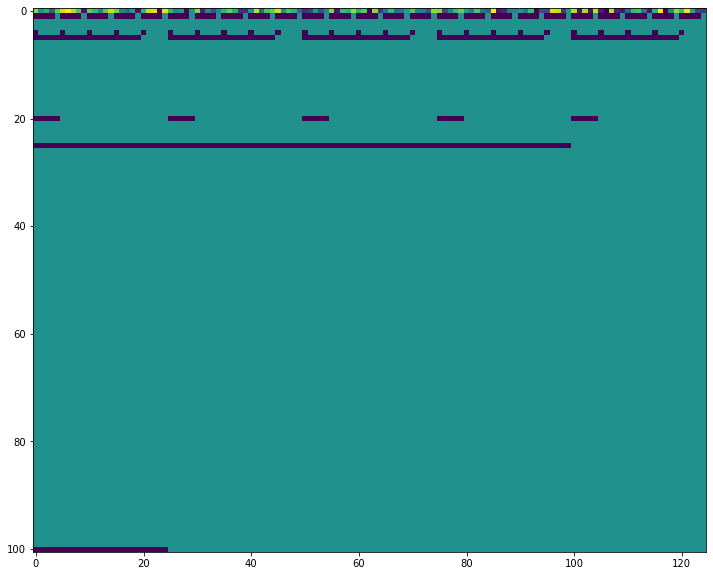

In [414]:
plt.figure(figsize=(15, 10))
plt.imshow(sparse_save)

In [415]:
w = eig_banded(sparse_save, lower=True, eigvals_only=True)

(array([ 1.,  6., 12., 14., 24., 21., 15., 19.,  5.,  8.]),
 array([-6.05422664, -4.92800533, -3.80178403, -2.67556272, -1.54934141,
        -0.4231201 ,  0.7031012 ,  1.82932251,  2.95554382,  4.08176512,
         5.20798643]),
 <BarContainer object of 10 artists>)

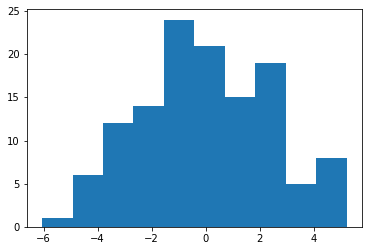

In [416]:
plt.hist(w)

In [417]:
e, v = np.linalg.eigh(Hamiltonian)

(array([ 1.,  0.,  0.,  5.,  1.,  0.,  3.,  8.,  1.,  6.,  3.,  5.,  6.,
        13.,  5.,  1.,  8., 12.,  4.,  8.,  3.,  0.,  8., 11.,  5.,  0.,
         0.,  0.,  2.,  6.]),
 array([-6.05422664, -5.67881954, -5.30341243, -4.92800533, -4.55259823,
        -4.17719113, -3.80178403, -3.42637692, -3.05096982, -2.67556272,
        -2.30015562, -1.92474851, -1.54934141, -1.17393431, -0.79852721,
        -0.4231201 , -0.047713  ,  0.3276941 ,  0.7031012 ,  1.07850831,
         1.45391541,  1.82932251,  2.20472961,  2.58013671,  2.95554382,
         3.33095092,  3.70635802,  4.08176512,  4.45717223,  4.83257933,
         5.20798643]),
 <BarContainer object of 30 artists>)

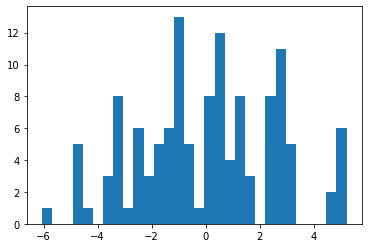

In [418]:
plt.hist(e, bins=30)